In [6]:
# Keras를 사용한 XOR 문제 해결
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print(f"TensorFlow 버전: {tf.__version__}")


TensorFlow 버전: 2.20.0


In [9]:
# XOR 데이터셋 준비
X = np.array([[0, 0],
              [0, 1], 
              [1, 0],
              [1, 1]], dtype=np.float32)

y = np.array([[0],
              [1],
              [1], 
              [0]], dtype=np.float32)

print("입력 데이터 (X):")
print(X)
print("\n출력 데이터 (y):")
print(y.flatten())

print(f"\n데이터 형태: X={X.shape}, y={y.shape}")


입력 데이터 (X):
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

출력 데이터 (y):
[0. 1. 1. 0.]

데이터 형태: X=(4, 2), y=(4, 1)


In [11]:
# 신경망 모델 구성
model = Sequential([
    Dense(4, input_dim=2, activation='relu', name='hidden_layer'),  # 은닉층: 4개 뉴런
    Dense(1, activation='sigmoid', name='output_layer')             # 출력층: 1개 뉴런
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 모델 구조 출력
print("=== 신경망 모델 구조 ===")
model.summary()

print("\n=== 모델 구성 ===")
print("입력층: 2개 뉴런 (x1, x2)")
print("은닉층: 4개 뉴런 (ReLU 활성화 함수)")
print("출력층: 1개 뉴런 (Sigmoid 활성화 함수)")
print("손실함수: Binary Crossentropy")
print("최적화기: Adam")


=== 신경망 모델 구조 ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


=== 모델 구성 ===
입력층: 2개 뉴런 (x1, x2)
은닉층: 4개 뉴런 (ReLU 활성화 함수)
출력층: 1개 뉴런 (Sigmoid 활성화 함수)
손실함수: Binary Crossentropy
최적화기: Adam


In [12]:
# 모델 훈련
print("=== 모델 훈련 시작 ===")

history = model.fit(
    X, y,
    epochs=1000,
    batch_size=4,
    verbose=0  # 훈련 과정 출력 안함
)

print("훈련 완료!")

# 최종 손실값과 정확도
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]

print(f"최종 손실값: {final_loss:.6f}")
print(f"최종 정확도: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")


=== 모델 훈련 시작 ===
훈련 완료!
최종 손실값: 0.472263
최종 정확도: 0.7500 (75.00%)


In [13]:
# 예측 결과 확인
print("=== 예측 결과 ===")
predictions = model.predict(X, verbose=0)

print("입력\t실제값\t예측값\t예측확률")
print("-" * 40)

for i in range(len(X)):
    x1, x2 = X[i]
    actual = int(y[i][0])
    prob = predictions[i][0]
    predicted = 1 if prob > 0.5 else 0
    
    print(f"[{int(x1)},{int(x2)}]\t{actual}\t{predicted}\t{prob:.6f}")

# 정확도 계산
predicted_classes = (predictions > 0.5).astype(int)
accuracy = np.mean(predicted_classes == y)
print(f"\n최종 정확도: {accuracy:.4f} ({accuracy*100:.2f}%)")


=== 예측 결과 ===
입력	실제값	예측값	예측확률
----------------------------------------
[0,0]	0	0	0.435379
[0,1]	1	0	0.435379
[1,0]	1	1	0.849293
[1,1]	0	0	0.275132

최종 정확도: 0.7500 (75.00%)


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

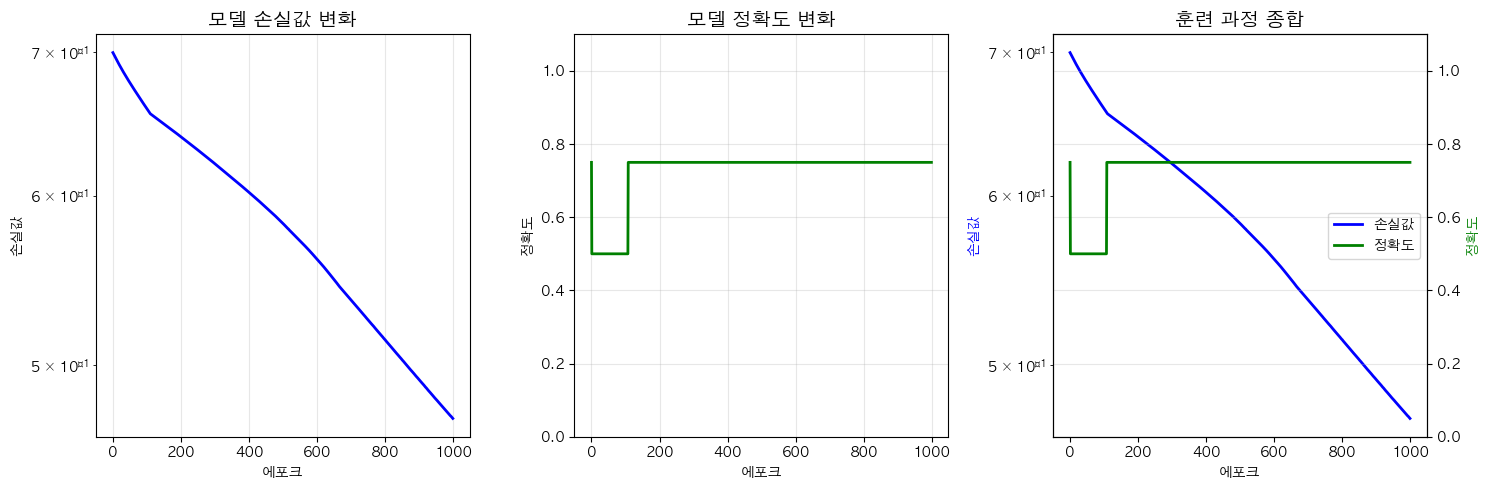

훈련 에포크: 1000
초기 손실값: 0.699567
최종 손실값: 0.472263
손실값 감소율: 32.49%


In [14]:
# 훈련 과정 시각화
plt.figure(figsize=(15, 5))

# 1. 손실값 변화
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'b-', linewidth=2)
plt.title('모델 손실값 변화', fontsize=14, fontweight='bold')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # 로그 스케일로 표시

# 2. 정확도 변화
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'g-', linewidth=2)
plt.title('모델 정확도 변화', fontsize=14, fontweight='bold')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

# 3. 손실값과 정확도 함께
plt.subplot(1, 3, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()

line1 = ax1.plot(history.history['loss'], 'b-', linewidth=2, label='손실값')
line2 = ax2.plot(history.history['accuracy'], 'g-', linewidth=2, label='정확도')

ax1.set_xlabel('에포크')
ax1.set_ylabel('손실값', color='b')
ax2.set_ylabel('정확도', color='g')
ax1.set_yscale('log')
ax2.set_ylim(0, 1.1)

# 범례 합치기
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right')

plt.title('훈련 과정 종합', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"훈련 에포크: {len(history.history['loss'])}")
print(f"초기 손실값: {history.history['loss'][0]:.6f}")
print(f"최종 손실값: {history.history['loss'][-1]:.6f}")
print(f"손실값 감소율: {((history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0] * 100):.2f}%")


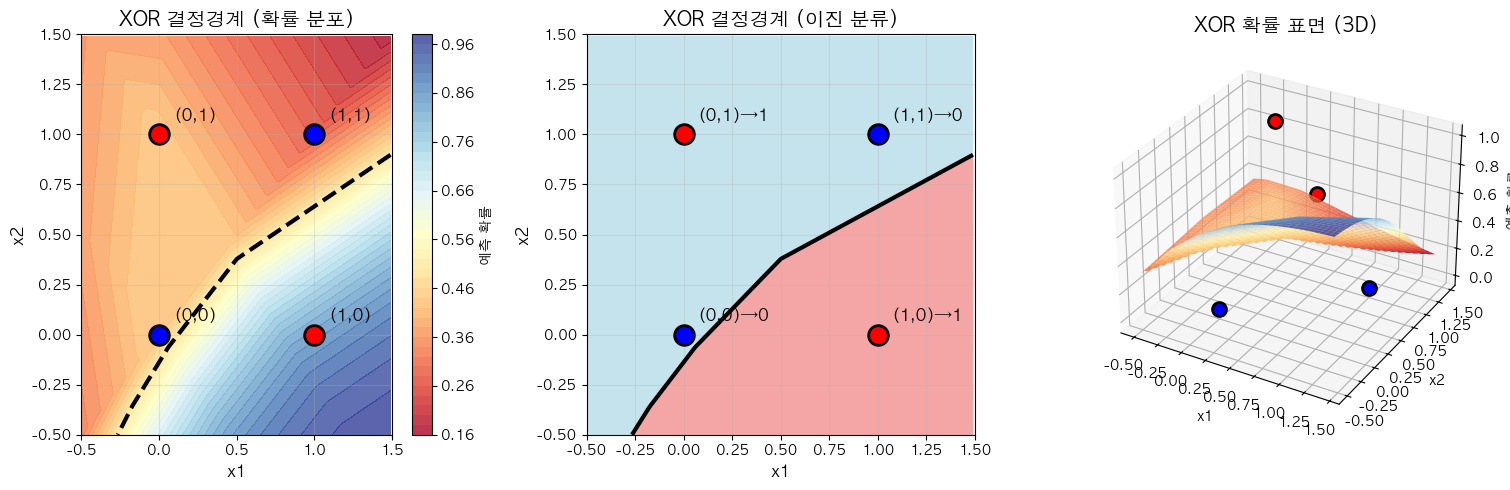

In [15]:
# 결정경계 시각화
def plot_decision_boundary_keras():
    # 입력 공간 생성
    h = 0.01
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 각 점에서 예측값 계산
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, verbose=0)
    Z = Z.reshape(xx.shape)
    
    # 결정경계 그리기
    plt.figure(figsize=(15, 5))
    
    # 1. 확률 분포 히트맵
    plt.subplot(1, 3, 1)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='예측 확률')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3, linestyles='--')
    
    # 실제 데이터 포인트
    colors = ['blue', 'red', 'red', 'blue']
    for i in range(len(X)):
        plt.scatter(X[i, 0], X[i, 1], c=colors[i], s=200, 
                   edgecolors='black', linewidth=2, zorder=5)
        plt.annotate(f'({int(X[i,0])},{int(X[i,1])})', 
                    (X[i, 0], X[i, 1]), xytext=(10, 10), 
                    textcoords='offset points', fontsize=12, fontweight='bold')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1', fontsize=12)
    plt.ylabel('x2', fontsize=12)
    plt.title('XOR 결정경계 (확률 분포)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 2. 이진 분류 결과
    plt.subplot(1, 3, 2)
    Z_binary = (Z > 0.5).astype(int)
    plt.contourf(xx, yy, Z_binary, levels=[0, 0.5, 1], colors=['lightblue', 'lightcoral'], alpha=0.7)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)
    
    for i in range(len(X)):
        plt.scatter(X[i, 0], X[i, 1], c=colors[i], s=200, 
                   edgecolors='black', linewidth=2, zorder=5)
        actual = int(y[i][0])
        plt.annotate(f'({int(X[i,0])},{int(X[i,1])})→{actual}', 
                    (X[i, 0], X[i, 1]), xytext=(10, 10), 
                    textcoords='offset points', fontsize=12, fontweight='bold')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1', fontsize=12)
    plt.ylabel('x2', fontsize=12)
    plt.title('XOR 결정경계 (이진 분류)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 3. 3D 확률 표면
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.subplot(1, 3, 3, projection='3d')
    
    # 더 성긴 그리드로 3D 시각화
    h_3d = 0.05
    xx_3d, yy_3d = np.meshgrid(np.arange(x_min, x_max, h_3d),
                               np.arange(y_min, y_max, h_3d))
    grid_points_3d = np.c_[xx_3d.ravel(), yy_3d.ravel()]
    Z_3d = model.predict(grid_points_3d, verbose=0)
    Z_3d = Z_3d.reshape(xx_3d.shape)
    
    surf = ax.plot_surface(xx_3d, yy_3d, Z_3d, cmap='RdYlBu', alpha=0.8)
    
    # 실제 데이터 포인트를 3D로 표시
    for i in range(len(X)):
        ax.scatter(X[i, 0], X[i, 1], y[i, 0], c=colors[i], s=100, 
                  edgecolors='black', linewidth=2, zorder=5)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('예측 확률')
    ax.set_title('XOR 확률 표면 (3D)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 결정경계 시각화 실행
plot_decision_boundary_keras()


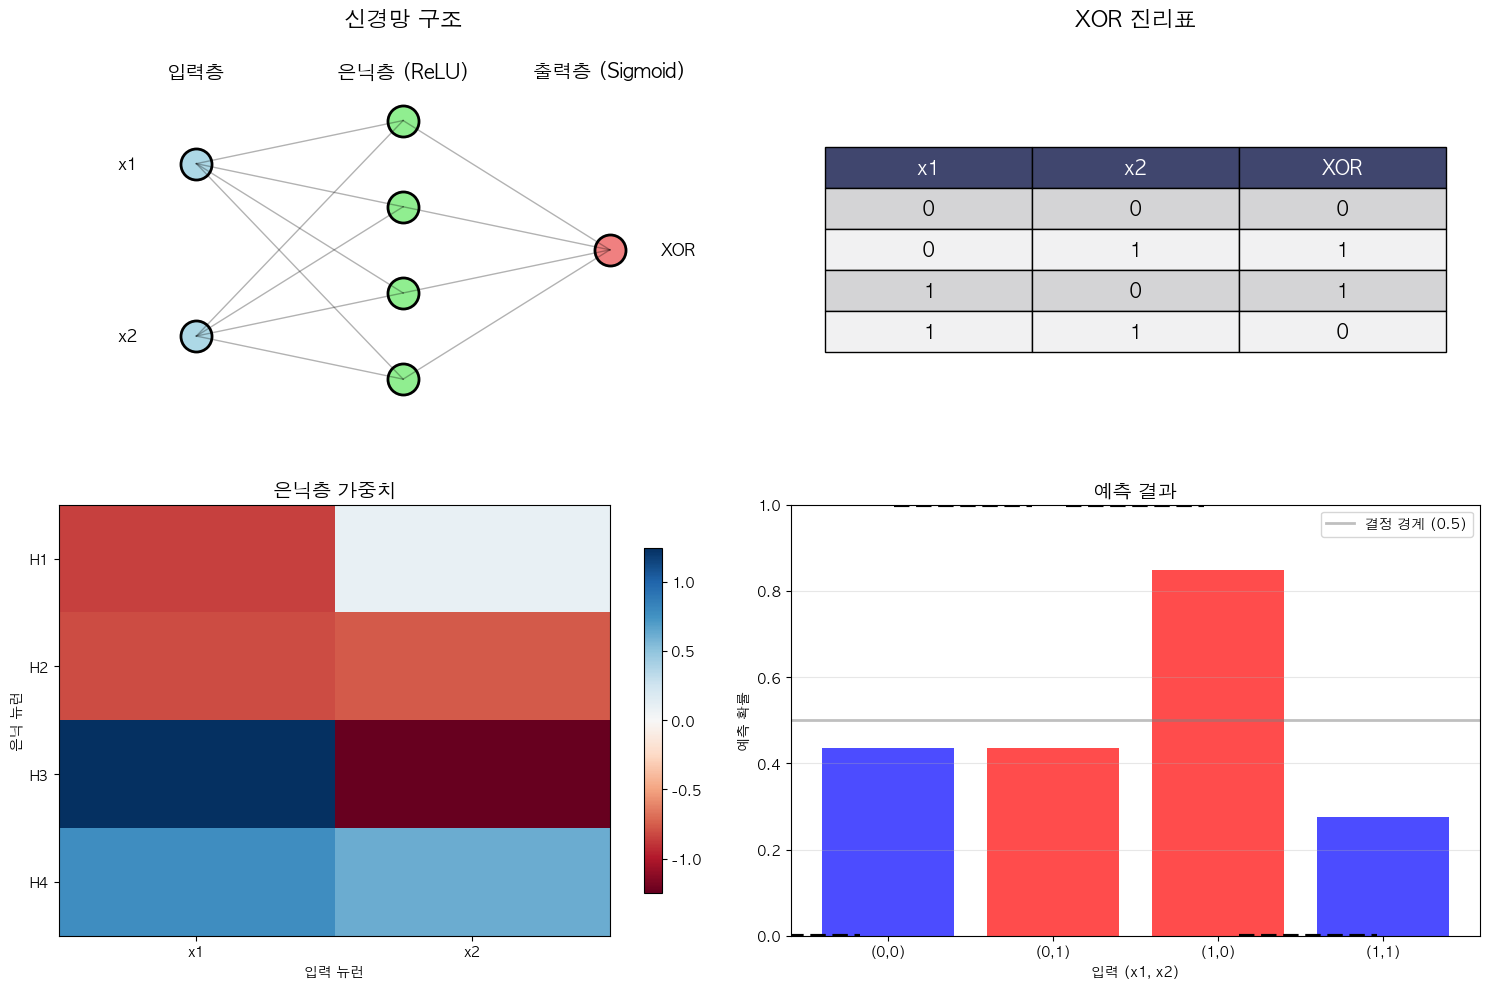

\n=== XOR 문제 해결 완료! ===
신경망이 성공적으로 XOR 논리 게이트를 학습했습니다.
은닉층의 비선형 활성화 함수(ReLU)를 통해
선형분리가 불가능한 XOR 문제를 해결할 수 있었습니다.


In [16]:
# 신경망 구조와 가중치 시각화
def plot_network_structure():
    plt.figure(figsize=(15, 10))
    
    # 1. 신경망 구조 다이어그램
    plt.subplot(2, 2, 1)
    
    # 뉴런 위치 정의
    input_neurons = [(0.2, 0.7), (0.2, 0.3)]  # 입력층
    hidden_neurons = [(0.5, 0.8), (0.5, 0.6), (0.5, 0.4), (0.5, 0.2)]  # 은닉층
    output_neuron = [(0.8, 0.5)]  # 출력층
    
    # 뉴런 그리기
    for pos in input_neurons:
        plt.scatter(pos[0], pos[1], s=500, c='lightblue', edgecolors='black', linewidth=2)
    for pos in hidden_neurons:
        plt.scatter(pos[0], pos[1], s=500, c='lightgreen', edgecolors='black', linewidth=2)
    for pos in output_neuron:
        plt.scatter(pos[0], pos[1], s=500, c='lightcoral', edgecolors='black', linewidth=2)
    
    # 연결선 그리기
    for i_pos in input_neurons:
        for h_pos in hidden_neurons:
            plt.plot([i_pos[0], h_pos[0]], [i_pos[1], h_pos[1]], 'k-', alpha=0.3, linewidth=1)
    
    for h_pos in hidden_neurons:
        for o_pos in output_neuron:
            plt.plot([h_pos[0], o_pos[0]], [h_pos[1], o_pos[1]], 'k-', alpha=0.3, linewidth=1)
    
    # 라벨 추가
    plt.text(0.1, 0.7, 'x1', fontsize=12, ha='center', va='center')
    plt.text(0.1, 0.3, 'x2', fontsize=12, ha='center', va='center')
    plt.text(0.9, 0.5, 'XOR', fontsize=12, ha='center', va='center')
    
    plt.text(0.2, 0.9, '입력층', fontsize=14, ha='center', fontweight='bold')
    plt.text(0.5, 0.9, '은닉층 (ReLU)', fontsize=14, ha='center', fontweight='bold')
    plt.text(0.8, 0.9, '출력층 (Sigmoid)', fontsize=14, ha='center', fontweight='bold')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title('신경망 구조', fontsize=16, fontweight='bold')
    
    # 2. XOR 진리표
    plt.subplot(2, 2, 2)
    plt.axis('off')
    
    table_data = [['x1', 'x2', 'XOR'],
                  ['0', '0', '0'],
                  ['0', '1', '1'],
                  ['1', '0', '1'],
                  ['1', '1', '0']]
    
    table = plt.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1.5, 2)
    
    # 헤더 스타일링
    for i in range(3):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # 데이터 행 스타일링
    colors = ['#f1f1f2', '#d4d4d6']
    for i in range(1, 5):
        for j in range(3):
            table[(i, j)].set_facecolor(colors[i % 2])
    
    plt.title('XOR 진리표', fontsize=16, fontweight='bold')
    
    # 3. 학습된 가중치 히트맵
    plt.subplot(2, 2, 3)
    
    # 첫 번째 층 가중치
    weights1, _ = model.layers[0].get_weights()
    im = plt.imshow(weights1.T, cmap='RdBu', aspect='auto')
    plt.colorbar(im, shrink=0.8)
    plt.title('은닉층 가중치', fontsize=14, fontweight='bold')
    plt.xlabel('입력 뉴런')
    plt.ylabel('은닉 뉴런')
    plt.xticks([0, 1], ['x1', 'x2'])
    plt.yticks(range(4), [f'H{i+1}' for i in range(4)])
    
    # 4. 예측 확률 막대그래프
    plt.subplot(2, 2, 4)
    
    predictions = model.predict(X, verbose=0).flatten()
    x_labels = [f'({int(X[i,0])},{int(X[i,1])})'for i in range(len(X))]
    actual_values = y.flatten()
    
    x_pos = np.arange(len(x_labels))
    bars = plt.bar(x_pos, predictions, alpha=0.7, 
                   color=['blue' if actual_values[i] == 0 else 'red' for i in range(len(actual_values))])
    
    # 실제값 표시선
    for i, actual in enumerate(actual_values):
        plt.axhline(y=actual, xmin=(i-0.4)/len(x_labels), xmax=(i+0.4)/len(x_labels), 
                   color='black', linewidth=3, linestyle='--')
    
    plt.axhline(y=0.5, color='gray', linewidth=2, linestyle='-', alpha=0.5, label='결정 경계 (0.5)')
    plt.xlabel('입력 (x1, x2)')
    plt.ylabel('예측 확률')
    plt.title('예측 결과', fontsize=14, fontweight='bold')
    plt.xticks(x_pos, x_labels)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

# 신경망 구조 시각화 실행
plot_network_structure()

print("\\n=== XOR 문제 해결 완료! ===")
print("신경망이 성공적으로 XOR 논리 게이트를 학습했습니다.")
print("은닉층의 비선형 활성화 함수(ReLU)를 통해")
print("선형분리가 불가능한 XOR 문제를 해결할 수 있었습니다.")


In [ ]:
import numpy as np

w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# Perceptron
def MLP(x: np.ndarray, w: np.ndarray, b: int) -> int:
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1


In [4]:
# NAND Gate
def NAND(x1: int, x2: int) -> int:
    return MLP(np.array([x1, x2]), w11, b1);

# OR Gate
def OR(x1: int, x2: int) -> int:
    return MLP(np.array([x1, x2]), w12, b2)

# AND Gate
def AND(x1: int, x2: int) -> int:
    return MLP(np.array([x1, x2]), w2, b3)

# XOR Gate
def XOR(x1: int, x2: int) -> int:
    return AND(NAND(x1, x2), OR(x1, x2))

# x1, x2값 번갈아 대입하며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))


    

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0
